In [1]:
import pandas as pd

anger_train=pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/anger-ratings-0to1.train.txt",
                        sep="\t", header= None,names=["id", "text", "emotion", "intensity"]) 
fear_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 
joy_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 
sadness_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/sadness-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True) 
### testing data


In [2]:
anger_test=pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/anger-ratings-0to1.dev.gold.txt",
                        sep="\t", header= None,names=["id", "text", "emotion", "intensity"]) 
fear_test = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 
joy_test = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/joy-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 
sadness_test = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/sadness-ratings-0to1.dev.gold.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 

test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()


,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


Exercise 1

Steps
    1. Tokenize words in the text column for both train and test datasets.
        # Remove punctuation and split by whitespace
    2. Calculate word frequencies across all texts.
    3. Plot the top 30 most frequent words in each dataset.

Train dataset

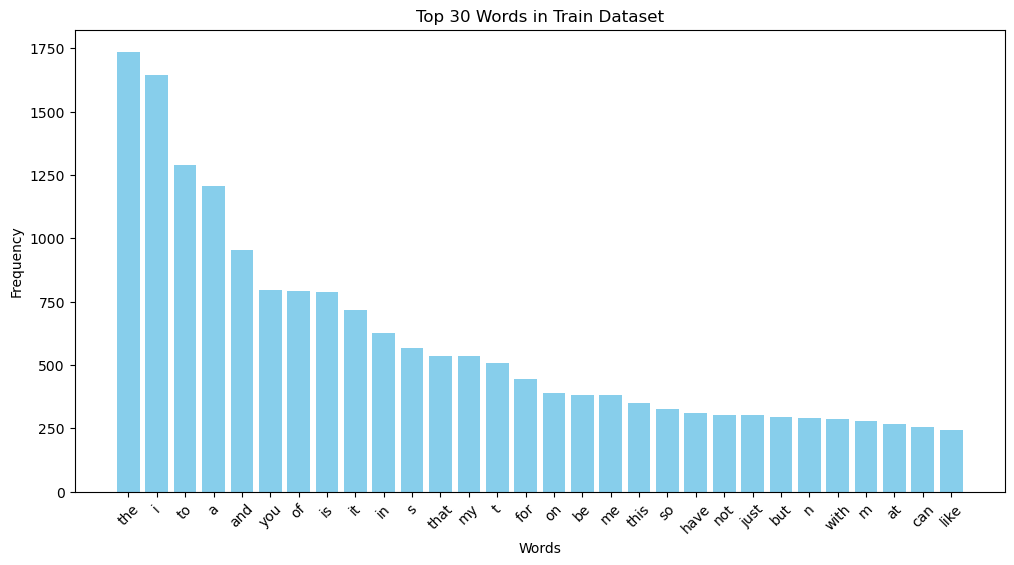

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

anger_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/anger-ratings-0to1.train.txt",
                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/sadness-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

def tokenize(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

def get_word_frequencies(df):
    all_words = []
    for text in df['text']:
        tokens = tokenize(text)
        all_words.extend(tokens)
    word_counts = Counter(all_words)
    return word_counts
train_word_counts = get_word_frequencies(train_df)
train_top_words = train_word_counts.most_common(30)

def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"Top 30 Words in {title} Dataset")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(train_top_words, "Train")





Test dataset

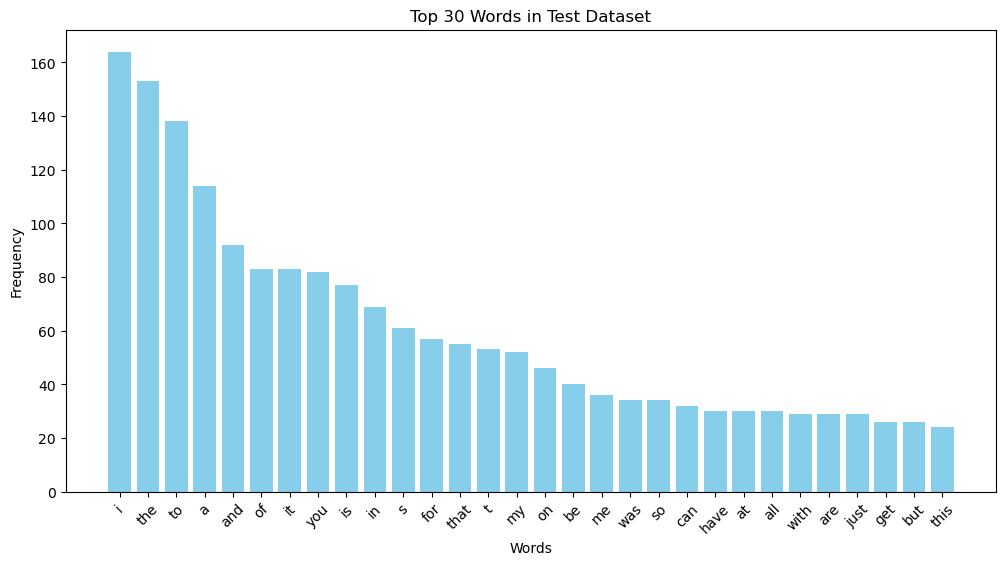

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

anger_test=pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/anger-ratings-0to1.dev.gold.txt",
                        sep="\t", header= None,names=["id", "text", "emotion", "intensity"]) 
fear_test = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 
joy_test = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/joy-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 
sadness_test = pd.read_csv("/Users/liaojingwen/Desktop/GoogleNews/sadness-ratings-0to1.dev.gold.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"]) 

test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

def tokenize(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

def get_word_frequencies(df):
    all_words = []
    for text in df['text']:
        tokens = tokenize(text)
        all_words.extend(tokens)
    word_counts = Counter(all_words)
    return word_counts
train_word_counts = get_word_frequencies(test_df)
train_top_words = train_word_counts.most_common(30)

def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"Top 30 Words in {title} Dataset")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(train_top_words, "Test")

Save data in Pickle format

In [5]:
train_df.to_pickle("/Users/liaojingwen/Desktop/GoogleNews/pkl/train_df.pkl")
test_df.to_pickle("/Users/liaojingwen/Desktop/GoogleNews/pkl/test_df.pkl")

import pandas as pd

train_df = pd.read_pickle("/Users/liaojingwen/Desktop/GoogleNews/pkl/train_df.pkl")
test_df = pd.read_pickle ("/Users/liaojingwen/Desktop/GoogleNews/pkl/test_df.pkl")

Exploratory data analysis

In [6]:
train_df.groupby (['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

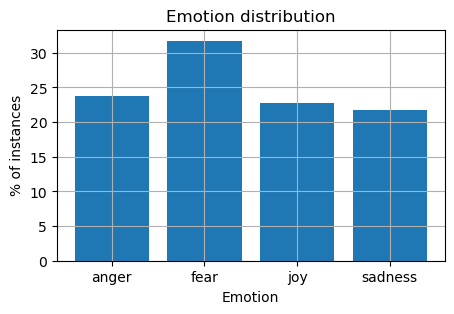

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
          # the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))
#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)
#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)


Feature engineering

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

BOW_vectorizer = CountVectorizer ()

BOW_vectorizer.fit(train_df['text'])

test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])

train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [9]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [10]:
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
train_data_BOW_features.shape

(3613, 10115)

In [12]:
feature_names = BOW_vectorizer.get_feature_names_out() 
feature_names[100:110]


array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [13]:
import nltk

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
          # apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

train_data_BOW_features_500.shape

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [14]:
train_data_BOW_features_500.toarray()

array([[3, 4, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
feature_names_500 = BOW_500.get_feature_names_out() 
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [16]:
"😂" in feature_names_500

True

Exercise 2

Steps 
    1. Replace CountVectorizer with TfidfVectorizer
    2. Use the .fit() and .transform() methods to fit the vectorizer to the training data and transform it.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])


feature_names_1000 = TFIDF_1000.get_feature_names_out() 
feature_names[100:110]




array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

3. Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [19]:
DT_model = DecisionTreeClassifier(random_state=1)

DT_model = DT_model.fit (X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

y_test_pred[:10]

array(['joy', 'anger', 'fear', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype=object)

4. Results Evaluation

In [20]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

print(cm)


[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


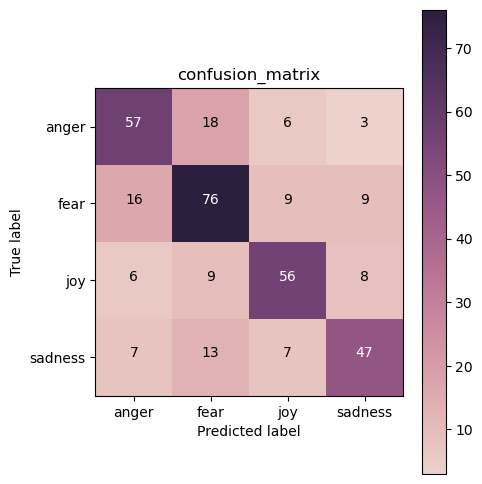

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=sns.cubehelix_palette(as_cmap=True)):
    
    classes = sorted(classes)
    
    tick_marks = np.arange(len(classes))
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        xlabel='Predicted label',
        ylabel='True label'
    )

    
    fmt = 'd'
    thresh = cm.max() / 2.
    
  
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -0.5])
    
    plt.tight_layout()
    plt.show()

my_tags = ['anger','fear','joy','sadness']
plot_confusion_matrix(cm, classes=my_tags, title='confusion_matrix')


Exercise 3

The result visualizes the performance of a classification model on a multi-class problem. We can see the classes of the data are represnted in each rows, and each column symbolizes the predicted class output. And, the numbers along the diagonal mean the counts of correctly classified instances. A high value along the digonal shows that the model perfoems well in identifying. For instance, for "fear", 76 samples were correctly classified as fear. On the other hand, the numbers off the diagonal represent misclassifications, which shows confusion between certain classes. In the case of "fear" and "anger", the model appears to confuse fairly often because there are higher misclassification counts in those areas. Last but not least, the visual cue, color gradient(from light to dark) helps the process of identification.


Exercise 4

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7178423236514523

Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.66      0.75       190
        fear       0.59      0.91      0.72       223
         joy       0.86      0.70      0.77       149
     sadness       0.74      0.54      0.63       161

    accuracy                           0.72       723
   macro avg       0.77      0.70      0.72       723
weighted avg       0.76      0.72      0.72       723



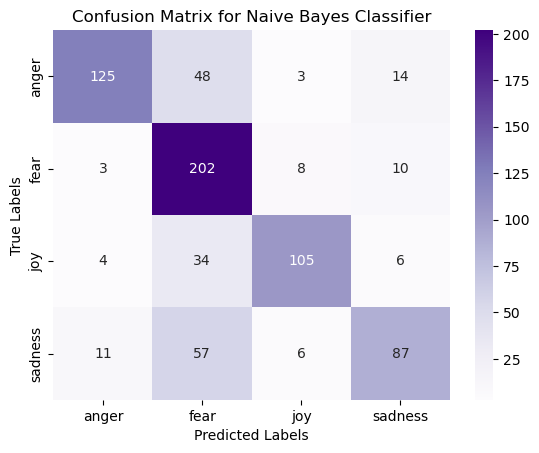

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train])
X = train_df['text']
y = train_df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


Exercise 5

Naive Bayes assumes that each word in a text is independent, which simplifies calculations and makes it efficient for high-dimensional data like text. This probabilistic approach often works well for text classification but struggles when classes share similar vocabulary, as seen in cases where "anger" texts are misclassified as "fear" due to shared emotion-related words. The model’s independence assumption limits its ability to capture nuanced patterns of word usage specific to each emotion.

Decision Trees, on the other hand, make splits based on specific words or combinations of words that maximize the separation between classes. This hierarchical structure allows them to capture interdependencies between words, which helps differentiate emotions with overlapping vocabularies by recognizing unique word patterns for each class. However, Decision Trees are prone to overfitting without regularization, especially in sparse, high-dimensional text data, as they may learn specific text patterns too rigidly rather than generalizing well.

6.1 Prepare data (X, y)


In [25]:
import keras

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
          ## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
import keras

BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

6.2 Deal with categorical label (y)

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


6.3 Build model

In [28]:
from sklearn.preprocessing import LabelEncoder
input_shape = X_train.shape[1] 
print('input_shape: ', input_shape)
      
output_shape = len(label_encoder.classes_) 
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [29]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

model_input = Input(shape=(input_shape, )) # 500
X = model_input
          
X_W1 = Dense(units=64)(X) # 64
H1 = ReLU()(X_W1)
          
H1_W2 = Dense(units=64)(H1) # 64
H2 = ReLU()(H1_W2)
          
H2_W3 = Dense(units=output_shape)(H2) # 4
H3 = Softmax()(H2_W3)
model_output = H3
          
model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

6.4 Train

In [30]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('/Users/liaojingwen/Desktop/ Lab 1&2/Lab2/training_log.csv')
          # training setting
epochs = 25
batch_size = 32
# training!
history = model.fit(X_train, y_train,
epochs=epochs,
batch_size=batch_size,
callbacks=[csv_logger],
validation_data = (X_test, y_test))

print('training finish')

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3331 - loss: 1.3574 - val_accuracy: 0.4784 - val_loss: 1.2641
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6087 - loss: 1.0897 - val_accuracy: 0.6686 - val_loss: 0.8953
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7910 - loss: 0.6170 - val_accuracy: 0.6974 - val_loss: 0.7601
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8599 - loss: 0.4008 - val_accuracy: 0.7089 - val_loss: 0.7631
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8873 - loss: 0.3162 - val_accuracy: 0.6945 - val_loss: 0.8118
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9193 - loss: 0.2496 - val_accuracy: 0.6916 - val_loss: 0.8512
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9356 - loss: 0.1999 - val_accuracy: 0.6830 - val_loss: 0.9216
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9491 - loss: 0.1772 - val_accuracy: 0

6.5 Predict on testing data

In [31]:
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[3.9142743e-02, 3.5476655e-01, 4.0459302e-01, 2.0149764e-01],
       [9.9998361e-01, 9.5668165e-06, 9.6572627e-08, 6.7730539e-06],
       [9.9171990e-01, 6.3272384e-03, 3.0400589e-08, 1.9528642e-03],
       [9.9941355e-01, 1.6267380e-06, 3.6988157e-04, 2.1490233e-04],
       [2.4759506e-01, 1.3151035e-03, 7.1373981e-01, 3.7350036e-02]],
      dtype=float32)

In [32]:
pred_result =label_decode(label_encoder,pred_result)
pred_result[:5]

array(['joy', 'anger', 'anger', 'anger', 'joy'], dtype=object)

In [33]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2))) 

testing accuracy: 0.66


In [34]:
training_log = pd.DataFrame()
training_log = pd.read_csv("/Users/liaojingwen/Desktop/ Lab 1&2/Lab2/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.375588,1.328030,0.478386,1.264060
1,1,0.652090,0.985864,0.668588,0.895336
2,2,0.792970,0.590314,0.697406,0.760103
3,3,0.842790,0.417372,0.708934,0.763065
4,4,0.879325,0.328039,0.694524,0.811810
5,5,0.909770,0.262501,0.691643,0.851181
6,6,0.929975,0.215670,0.682997,0.921578
7,7,0.946305,0.180624,0.671470,0.970819
8,8,0.952671,0.150444,0.665706,1.051751
9,9,0.960144,0.135957,0.682997,1.084481


Exercise 6


The graphs show that the training accuracy is near perfect and remains stable across epochs, while the validation accuracy is significantly lower and fluctuates, indicating that the model is likely overfitting. The training loss is close to zero, suggesting that the model fits the training data almost perfectly, while the validation loss increases over time, further confirming overfitting. This pattern implies that the model has learned the training data too well, including its noise, which prevents it from generalizing effectively to new, unseen data.

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9808 - loss: 0.0517 - val_accuracy: 0.6859 - val_loss: 1.5637
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9787 - loss: 0.0509 - val_accuracy: 0.6628 - val_loss: 1.6049
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9819 - loss: 0.0475 - val_accuracy: 0.6801 - val_loss: 1.5550
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.9802 - loss: 0.0522 - val_accuracy: 0.6628 - val_loss: 1.5751
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.9831 - loss: 0.0401 - val_accuracy: 0.6628 - val_loss: 1.5803
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9845 - loss: 0.0455 - val_accuracy: 0.6686 - val_loss: 1.5938
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9810 - loss: 0.0530 - val_accuracy: 0.6715 - val_loss: 1.6121
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9799 - loss: 0.0556 - va

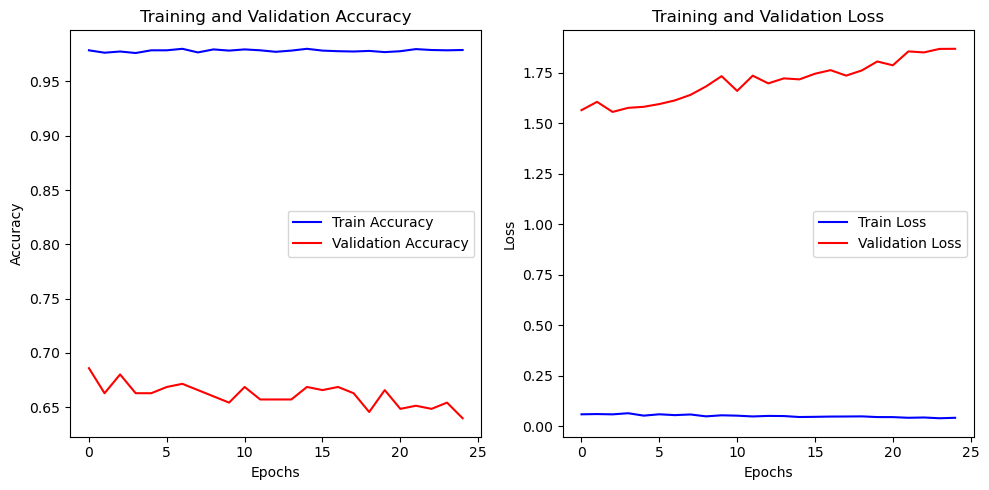

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import CSVLogger
from sklearn.metrics import accuracy_score

# Assuming your code until model.fit() is as provided
csv_logger = CSVLogger('/Users/liaojingwen/Desktop/ Lab 1&2/Lab2/training_log.csv')
epochs = 25
batch_size = 32

# Training with CSVLogger to save the logs
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data=(X_test, y_test))

# Load the training log to check if saved correctly
training_log = pd.read_csv("/Users/liaojingwen/Desktop/ Lab 1&2/Lab2/training_log.csv")

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


7.1 Prepare training corpus

In [36]:
import gensim
import warnings 
import logging

warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

train_df['text_tokenized'] =train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()


,id,text,text_tokenized
0,10000,How the fu*k! Who the heck! moved my fridge!.....,"[How, the, fu, *, k, !, Who, the, heck, !, mov..."
1,10001,So my Indian Uber driver just called someone t...,"[So, my, Indian, Uber, driver, just, called, s..."
2,10002,@DPD_UK I asked for my parcel to be delivered ...,"[@, DPD_UK, I, asked, for, my, parcel, to, be,..."
3,10003,so ef whichever butt wipe pulled the fire alar...,"[so, ef, whichever, butt, wipe, pulled, the, f..."
4,10004,Don't join @BTCare they put the phone down on ...,"[Do, n't, join, @, BTCare, they, put, the, pho..."


In [37]:
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]


array([list(['How', 'the', 'fu', '*', 'k', '!', 'Who', 'the', 'heck', '!', 'moved', 'my', 'fridge', '!', '...', 'should', 'I', 'knock', 'the', 'landlord', 'door', '.', '#', 'angry', '#', 'mad', '#', '#']),
       list(['So', 'my', 'Indian', 'Uber', 'driver', 'just', 'called', 'someone', 'the', 'N', 'word', '.', 'If', 'I', 'was', "n't", 'in', 'a', 'moving', 'vehicle', 'I', "'d", 'have', 'jumped', 'out', '#', 'disgusted']),
       list(['@', 'DPD_UK', 'I', 'asked', 'for', 'my', 'parcel', 'to', 'be', 'delivered', 'to', 'a', 'pick', 'up', 'store', 'not', 'my', 'address', '#', 'fuming', '#', 'poorcustomerservice'])],
      dtype=object)

7.2 Training our model

In [38]:
from gensim.models import Word2Vec

vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

word2vec_model = Word2Vec(sentences=training_corpus,
vector_size=vector_dim, window=window_size,
min_count=min_count, epochs=training_epochs)

2024-12-06 11:13:21,802 : INFO : collecting all words and their counts
2024-12-06 11:13:21,803 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-12-06 11:13:21,811 : INFO : collected 11884 word types from a corpus of 72464 raw words and 3613 sentences
2024-12-06 11:13:21,811 : INFO : Creating a fresh vocabulary
2024-12-06 11:13:21,827 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11884 unique words (100.00% of original 11884, drops 0)', 'datetime': '2024-12-06T11:13:21.827115', 'gensim': '4.3.3', 'python': '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]', 'platform': 'macOS-13.4-arm64-arm-64bit', 'event': 'prepare_vocab'}
2024-12-06 11:13:21,827 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72464 word corpus (100.00% of original 72464, drops 0)', 'datetime': '2024-12-06T11:13:21.827786', 'gensim': '4.3.3', 'python': '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18

7.3 Generating word vector

In [39]:
word_vec = word2vec_model.wv['happy']
word_vec

array([ 6.44157290e-01,  5.00243485e-01,  1.95350379e-01,  5.82737207e-01,
       -2.25115433e-01, -9.01248991e-01,  4.82523590e-01,  1.32539046e+00,
       -2.11283654e-01, -2.27007762e-01, -4.64960098e-01, -4.77985203e-01,
       -3.98525208e-01,  5.34331739e-01, -8.13552411e-04, -3.67326200e-01,
        6.18597507e-01, -3.81011367e-01,  1.80099681e-01, -1.04832351e+00,
        3.98224622e-01,  7.78210163e-01,  5.21655083e-01, -2.91289300e-01,
        1.32285684e-01,  5.04077494e-01, -6.22317553e-01,  1.44955143e-01,
       -3.00359368e-01,  4.70425189e-01,  3.02302539e-02,  1.30455241e-01,
        6.74849212e-01, -5.85216820e-01, -2.31334969e-01,  6.19040489e-01,
        2.32930720e-01, -2.07346007e-01, -7.12974548e-01, -1.01221107e-01,
        1.73234507e-01, -4.25039828e-01, -1.89195067e-01,  3.20484303e-02,
        4.46116000e-01, -4.41436470e-02, -6.15857840e-01, -1.04649477e-01,
        4.85078990e-01, -1.01688385e-01, -1.08716637e-01, -3.38404417e-01,
       -2.08216935e-01, -

In [40]:
word = 'happy' 
topn = 10
word2vec_model.wv.most_similar(word, topn=topn) 

[('Be', 0.9345296621322632),
 ('O', 0.926719069480896),
 ('birthday', 0.9261088967323303),
 ("'you", 0.9257780909538269),
 ('help', 0.9162629842758179),
 ('right', 0.9154891967773438),
 ('Kik', 0.9150055050849915),
 ('smile', 0.9145021438598633),
 ('cats', 0.90560382604599),
 ('r', 0.9055901765823364)]

7.4 Using a pre-trained w2v model

In [41]:
from gensim.models import KeyedVectors
          
model_path = "/Users/liaojingwen/Desktop/GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn = 10)


2024-12-06 11:13:22,755 : INFO : loading projection weights from /Users/liaojingwen/Desktop/GoogleNews/GoogleNews-vectors-negative300.bin
2024-12-06 11:13:34,547 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/liaojingwen/Desktop/GoogleNews/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-12-06T11:13:34.547050', 'gensim': '4.3.3', 'python': '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]', 'platform': 'macOS-13.4-arm64-arm-64bit', 'event': 'load_word2vec_format'}


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

7.5 king + woman - man = ?

In [42]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

Exercise 7

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define your sentence vector function
def sentence_vector_average(sentence, model):
    vectors = [model[word] for word in sentence if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Example dataset: List of sentences and their labels
sentences = [
    ['I', 'am', 'happy'],
    ['I', 'feel', 'great'],
    ['I', 'am', 'sad'],
    ['I', 'feel', 'terrible']
]
labels = [1, 1, 0, 0]  # Example labels, e.g., 1 for positive, 0 for negative

# Convert each sentence to a vector
sentence_vectors = np.array([sentence_vector_average(sentence, w2v_google_model) for sentence in sentences])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, labels, test_size=0.25, random_state=42)

# Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.0


8. Clustering: k-means

In [44]:
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer'] 
print('target words: ', target_list)

X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [45]:
from sklearn.cluster import KMeans

k=2

kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

cluster_result = kmeans_model.labels_

for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [46]:
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [47]:
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

9.1 Prepare visualizing target

In [48]:
word_list = ['happy', 'angry', 'data', 'mining']
topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)
print('\ncolor list:')

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


9.2 Plot using t-SNE and UMAP (2-dimension)

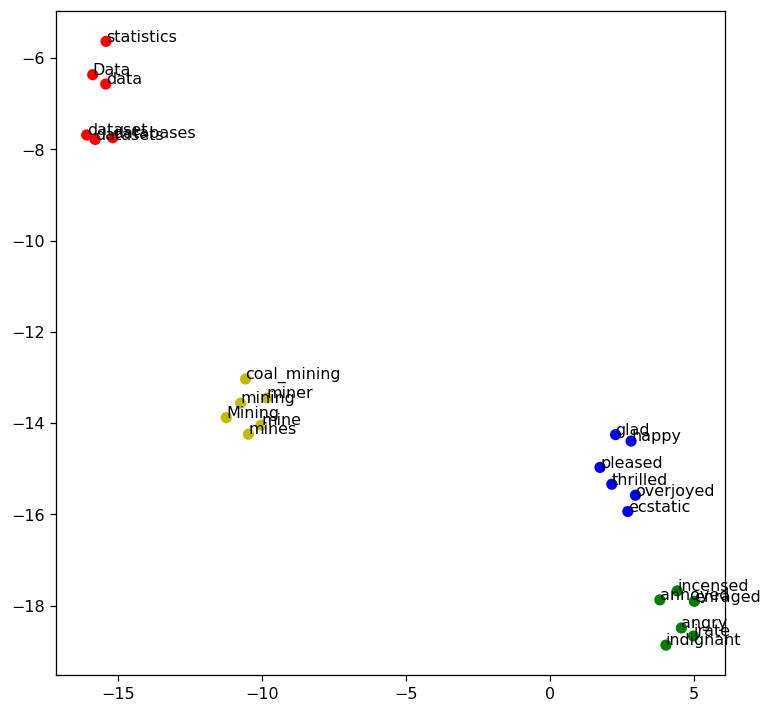

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
## w2v model
model = w2v_google_model
          ## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
          ## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
## training
X_tsne = tsne.fit_transform(X_train)
          ## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)

for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.show()

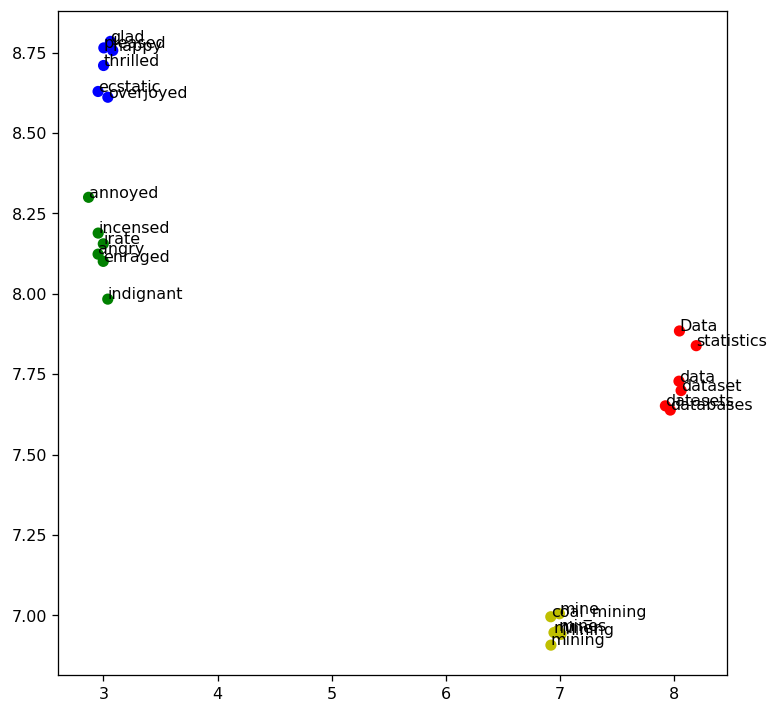

In [50]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
## w2v model
model = w2v_google_model
          ## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
## training
X_umap = umap_model.fit_transform(X_train)
          ## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.show()


Exercise 8

Differences between t-SNE and UMAP visualization

The most distinct difference between them lies in cluster separation and compactness. For t-SNE, it creates well-defined clusters, but these clusters can be arbitrarily spread out across the plot without a clear distance relationship between them. Conversely, UMAP produces more meaningful separation between different clusters. For example, words related to "happy" might be closer to "sad" in UMAP if they share some semantic similarities, while t-SNE might place them farther apart.

2024-12-06 11:15:06,134 : INFO : loading projection weights from /Users/liaojingwen/Desktop/GoogleNews/GoogleNews-vectors-negative300.bin
2024-12-06 11:15:17,356 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/liaojingwen/Desktop/GoogleNews/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-12-06T11:15:17.353838', 'gensim': '4.3.3', 'python': '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]', 'platform': 'macOS-13.4-arm64-arm-64bit', 'event': 'load_word2vec_format'}


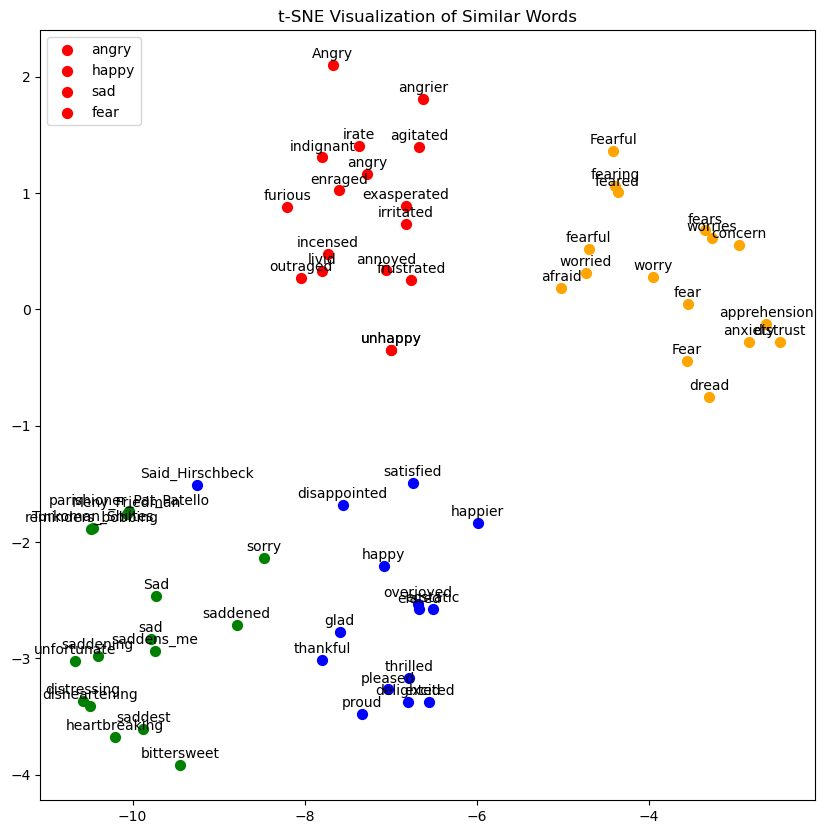

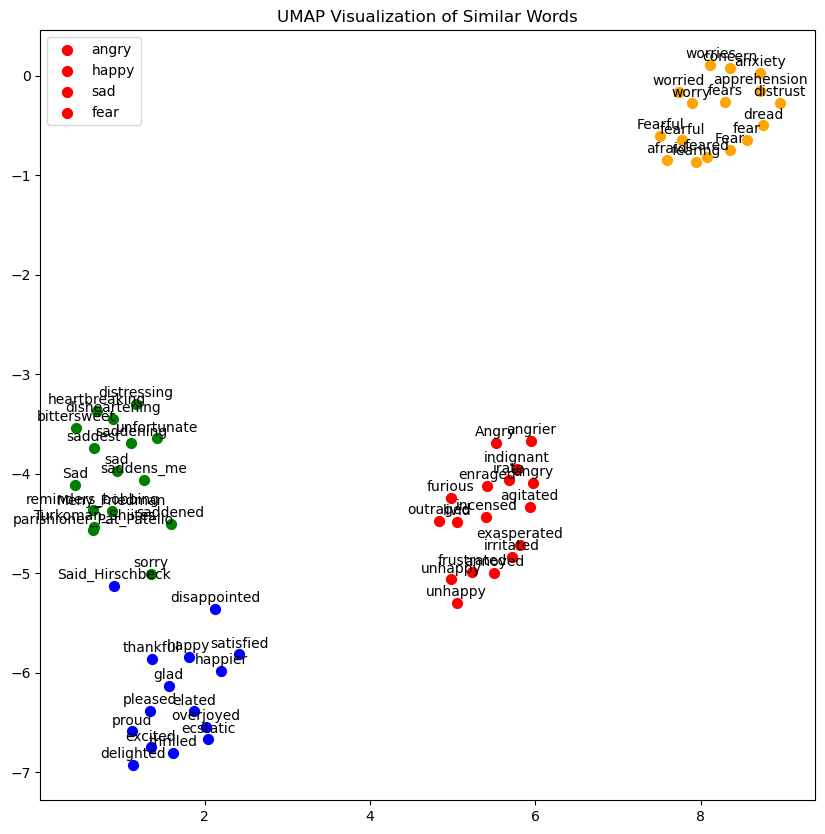

In [51]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from gensim.models import KeyedVectors
import numpy as np

model_path = "/Users/liaojingwen/Desktop/GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

target_words = ["angry", "happy", "sad", "fear"]
similar_words = {}

for word in target_words:
    similar_words[word] = [sim[0] for sim in w2v_google_model.most_similar(word, topn=15)]


all_words = [word for words in similar_words.values() for word in words]
all_words.extend(target_words) 

word_vectors = np.array([w2v_google_model[word] for word in all_words])

#t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne.fit_transform(word_vectors)

#UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_umap = umap_reducer.fit_transform(word_vectors)

# Plotting function for t-SNE and UMAP
def plot_embeddings(X, title):
    plt.figure(figsize=(10, 10))
    colors = ['red', 'blue', 'green', 'orange']
    
    # Plot each word with its respective color
    for i, word in enumerate(all_words):
        target_word = [t for t in target_words if word in similar_words[t] or word == t][0]
        color_idx = target_words.index(target_word)
        plt.scatter(X[i, 0], X[i, 1], c=colors[color_idx], label=target_word if word == target_word else "", s=50)
        plt.annotate(word, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')
    
    plt.title(title)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.keys(), loc="upper left")
    plt.show()

# Plot t-SNE result
plot_embeddings(X_tsne, "t-SNE Visualization of Similar Words")

# Plot UMAP result
plot_embeddings(X_umap, "UMAP Visualization of Similar Words")


10.1 Text Prompting

In [52]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
              {
                  'role': 'user',
                  'content': 'What is data mining? (in markdown format)'
},
])
print(response['message']['content'])

2024-12-06 11:16:37,641 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques and algorithms to extract valuable information from raw data.

### Key Characteristics

*   **Automation**: Data mining is typically done using software tools or algorithms that can automate the process.
*   **Large Datasets**: Data mining often involves working with massive amounts of data, such as customer transaction records or sensor readings.
*   **Pattern Discovery**: The goal of data mining is to discover hidden patterns, relationships, and insights in the data.

### Types of Data Mining

*   **Descriptive Data Mining**: Involves summarizing and describing existing data to understand its characteristics.
*   **Diagnostic Data Mining**: Focuses on identifying why something happened, often used for troubleshooting or anomaly detection.
*   **Predictive Data Mining**: Uses historical data to predict 

In [53]:
from IPython.display import display, Markdown, Latex

display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [54]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques and algorithms to extract valuable information from raw data.

### Key Characteristics

*   **Automation**: Data mining is typically done using software tools or algorithms that can automate the process.
*   **Large Datasets**: Data mining often involves working with massive amounts of data, such as customer transaction records or sensor readings.
*   **Pattern Discovery**: The goal of data mining is to discover hidden patterns, relationships, and insights in the data.

### Types of Data Mining

*   **Descriptive Data Mining**: Involves summarizing and describing existing data to understand its characteristics.
*   **Diagnostic Data Mining**: Focuses on identifying why something happened, often used for troubleshooting or anomaly detection.
*   **Predictive Data Mining**: Uses historical data to predict future outcomes or behaviors.

### Common Data Mining Techniques

*   **Association Rule Learning**: Identifies patterns of association between different items in the data.
*   **Clustering**: Groups similar data points together based on their characteristics.
*   **Regression Analysis**: Predicts continuous values based on one or more predictor variables.
*   **Text Mining**: Extracts insights from unstructured text data.

### Real-World Applications

*   **Marketing**: Data mining is used to analyze customer behavior, predict churn, and personalize marketing efforts.
*   **Healthcare**: Data mining helps identify disease patterns, detects anomalies in medical records, and optimizes treatment plans.
*   **Finance**: Data mining aids in risk assessment, credit scoring, and portfolio optimization.

### Benefits

*   **Improved Decision-Making**: Data mining provides actionable insights that support informed decision-making.
*   **Increased Efficiency**: Automation of data analysis reduces manual effort and improves accuracy.
*   **Enhanced Customer Experience**: Personalized marketing and recommendations lead to increased customer satisfaction.

Exercise 9

The role of "system" & "user"



In the following context, the system role sets the overall behavior, tone, or style for the assistant. It acts as a guiding framework for how the assistant should respond to the user's inputs. For example, the assistant's expertise is a "fitness coach", and the responses are provided in markdown format. On the other hand, the user role represents the input or question provided by the end-user. This is the actual prompt that the assistant needs to respond to based on the system instructions. Therefore, we can observe that the system defines the assistant’s behavior, while the user provides the specific input or task for the assistant to respond to.

In [57]:
from IPython.display import display, Markdown
import ollama

# Call the Ollama chat API
response = ollama.chat(
    model='llama3.2',
    messages=[
        {"role": "system", "content": "You are a fitness coach who gives advice about workout routines and diet plans."},
        {"role": "user", "content": "Make an exercise plan for a person with diabetes illness (in markdown format)."}
    ]
)

# Display the response content as Markdown
display(Markdown(response['message']['content']))


2024-12-06 11:23:52,738 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Diabetes Exercise Plan**
=========================

As a fitness coach, I've created a comprehensive exercise plan to help individuals with diabetes manage their condition and improve overall health.

**Before You Start**
--------------------

* Consult with your doctor or healthcare provider before beginning any new exercise program.
* Monitor your blood sugar levels regularly to ensure you're not experiencing hypoglycemia (low blood sugar) during or after exercise.
* Wear a fitness tracker or mobile device to track your activity, heart rate, and other health metrics.

**Exercise Goals**
-----------------

* Aim for at least 150 minutes of moderate-intensity aerobic exercise per week.
* Incorporate strength training exercises 2-3 times per week to improve insulin sensitivity.
* Increase daily physical activity by taking the stairs, walking, or cycling instead of driving.

**Workout Routine**
------------------

### Aerobic Exercise (30 minutes, 5 days a week)

* Brisk walking
* Swimming
* Cycling
* Dancing
* Jumping rope

Example:
```markdown
| Day | Activity | Duration |
| --- | --- | --- |
| Mon | Brisk Walking | 30 min |
| Tue | Swimming | 30 min |
| Wed | Rest day |
| Thu | Cycling | 30 min |
| Fri | Dancing | 30 min |
```

### Strength Training (2-3 times a week)

* Focus on lower-body exercises to improve insulin sensitivity.
* Use free weights, resistance bands, or machines at the gym.

Example:
```markdown
| Day | Exercise | Sets | Reps |
| --- | --- | --- | --- |
| Mon | Squats | 3 | 12 |
| Tue | Lunges | 3 | 12 |
| Wed | Rest day |
| Thu | Leg Press | 3 | 12 |
| Fri | Calf Raises | 3 | 12 |
```

### High-Intensity Interval Training (HIIT) (1 time a week)

* Alternate between 30 seconds of high-intensity exercise and 30 seconds of rest.
* Examples include burpees, jump squats, or mountain climbers.

Example:
```markdown
| Day | Exercise | Duration |
| --- | --- | --- |
| Sat | HIIT Circuit | 20 min |
| Sun | Rest day |
```

**Dietary Considerations**
-------------------------

* Focus on a balanced diet with plenty of fruits, vegetables, whole grains, and lean protein sources.
* Choose complex carbohydrates to help regulate blood sugar levels.
* Avoid sugary drinks and foods high in added sugars.

Example:
```markdown
| Food | Serving Size | Glycemic Index |
| --- | --- | --- |
| Whole Wheat Bread | 1 slice | 30-40 |
| Brown Rice | 1 cup cooked | 50-60 |
| Grilled Chicken Breast | 3 oz | 0-5 |
```

**Tips and Reminders**
----------------------

* Drink plenty of water before, during, and after exercise to stay hydrated.
* Monitor your blood sugar levels regularly and adjust your diet and exercise plan as needed.
* Consult with a registered dietitian or certified diabetes educator for personalized guidance.

By following this exercise plan and making healthy dietary choices, you can manage your diabetes symptoms, improve overall health, and increase your quality of life.

10.2 Multi-Modal Prompting - Text+Images 

In [58]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
{
'role': 'user',
'images': ['//Users/liaojingwen/Desktop/Lab2/dog.jpeg'] #Image with the dog 'content': 'What is this image about?',
},
])
display(Markdown(response2['message']['content']))

2024-12-06 11:32:19,589 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


This is a photo of an Akita dog in mid-air. The dog, with its brown and white fur, appears to be jumping or running across a grassy lawn. Its tail is visible above the body as it moves through the air. The background features trees and a fence, suggesting that this scene takes place outdoors in a suburban or rural setting. The dog's playful action gives life to the image, capturing a moment of joy and freedom.

Exercise 10

The overall description of the photo is accurate, including background of the picture and some usage of adjective to describe the scenerary. Through description, we can have a brief picture or understanding of layouts in our mind even if we have never seen the photo

(photo I used)

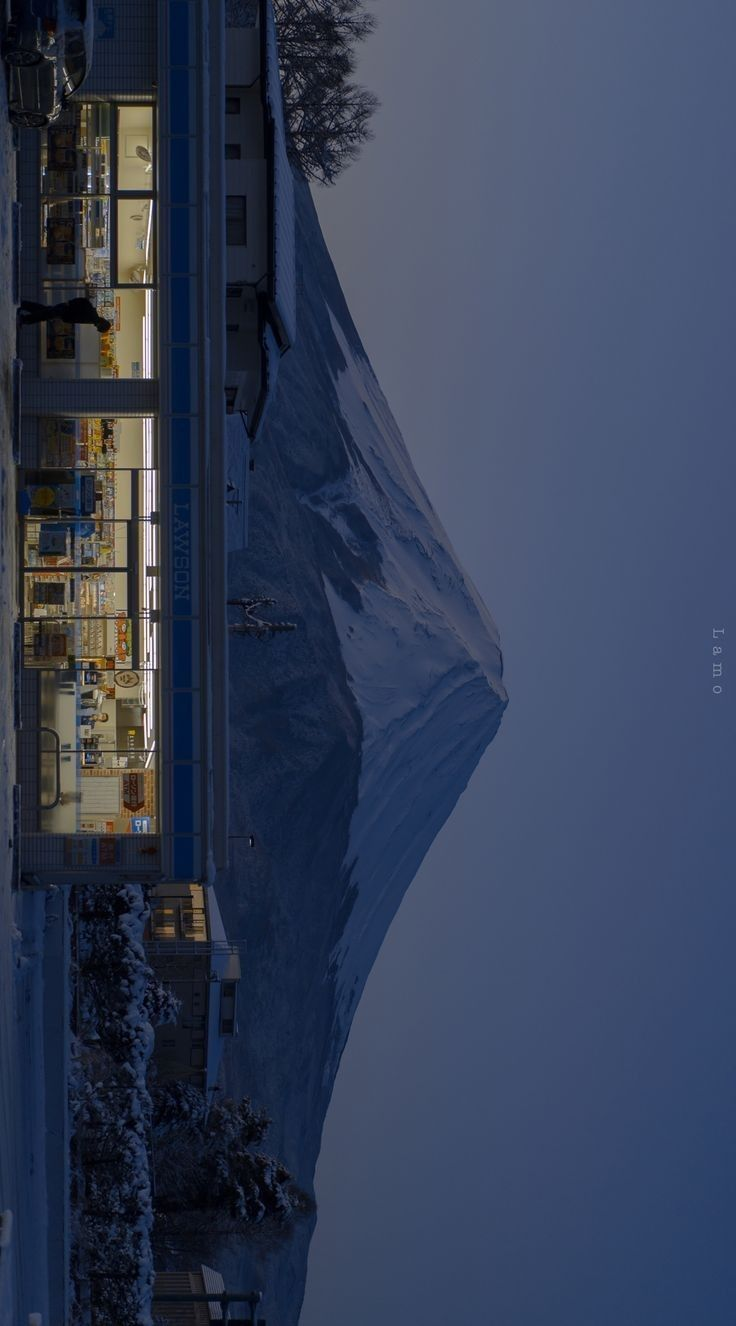

In [62]:
from IPython.display import Image, display

display(Image(filename='/Users/liaojingwen/Desktop/Lab2/fuji.jpg'))


In [59]:
response3 = ollama.chat(model='llava-phi3', messages=[
{
'role': 'user',
'images': ['/Users/liaojingwen/Desktop/Lab2/fuji.jpg'] 
},
])

display(Markdown(response3['message']['content']))


2024-12-06 11:34:27,887 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


The image captures a breathtaking view of a mountainous landscape under the enchanting glow of night. The mountains, majestically rising in the background, are adorned with patches of snow that sparkle subtly against the darker hues of the rocky facade. The sky above is a deep blue canvas, punctuated by the faint white outline of a solitary star. 

In stark contrast to the natural beauty of the scene, there are buildings visible in the foreground. These structures exhibit modern architectural style with their sleek lines and minimalist design. They stand as silent observers to the grandeur unfolding behind them.

The image is taken from a low angle, looking up at the mountains, giving an impression of scale that accentuates their towering presence. The photo appears slightly overexposed, adding to its ethereal quality. Despite this technical aspect, it's hard not to be captivated by the raw beauty and grandeur that this image presents.

10.3 Retrieval-Augmented Generation (RAG)

In [63]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
# Function to load, split, and retrieve documents

llm_model = "llama3.2"

def load_and_retrieve_docs(url):
    loader = WebBaseLoader( 
        web_paths=(url,), 
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
              #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
          # Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting
          # Define the Ollama LLM function

def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']


def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)
          # Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))


2024-12-06 11:54:28,083 : WARNING : USER_AGENT environment variable not set, consider setting it to identify your requests.
/var/folders/zr/gvlyyg253qv328k2f7cgzgwr0000gn/T/ipykernel_4887/2605506122.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
2024-12-06 11:54:30,112 : INFO : Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
2024-12-06 11:54:51,355 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Based on the provided context, IBM's related solutions with LLMs (Large Language Models) include:

1. Granite model series on watsonx.ai: This is a generative AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. watsonx Assistant: A conversational AI service that leverages the Granite model series to provide natural language understanding (NLU) and natural language processing (NLP) capabilities.
3. watsonx Orchestrate: An AI-powered orchestration platform that utilizes the Granite model series to automate workflows, streamline processes, and improve efficiency.

These solutions demonstrate IBM's commitment to integrating LLMs into its enterprise offerings to enhance NLU and content generation capabilities across various business functions and use cases.

Exercise 11

Advantages of RAG systems 

1. Grounded Responses: RAG enhances the factual accuracy of LLM responses by grounding them in real-world data.
2. Dynamic Knowledge Base: Enables querying dynamic or frequently updated sources (e.g., websites or databases).
3. Reduced Hallucination: Reduces the likelihood of hallucinated (fabricated) responses by tying answers to retrieved documents.
4. Versatility: Can be applied across domains like research, education, and customer support.

Disadvantages of RAG systems

1. Latency: Document retrieval and chunking add computational overhead, increasing response time.
2. Dependency on Retrieval Quality: Poor retrieval (irrelevant or incomplete documents) results in subpar answers.
3. Context Length Limits: The amount of retrieved text that can be processed by the model is limited by its context window size.
4. Preprocessing Complexity: Splitting documents into chunks, creating embeddings, and maintaining vector stores add complexity.

In [64]:
import bs4
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from IPython.display import display, Markdown
import ollama

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    llm_model = "llama3.2"  # Specify the language model
    docs = []

    # Load content from all provided URLs
    for url in urls:
        loader = WebBaseLoader(web_paths=(url,), bs_kwargs={})
        docs.extend(loader.load())  # Append documents from each URL

    # Split documents into manageable chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)

    # Generate embeddings and build a vector database
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

    return vectorstore.as_retriever()

# Function to format retrieved documents for prompting
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Function to generate a response using the Ollama LLM
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain to combine retrieval and generation
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Example usage
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/cloud/watson-assistant",
    "https://www.ibm.com/cloud/watson-studio"
]

# Create a retriever for the provided URLs
retriever = load_and_retrieve_docs(urls)

# Ask questions
questions = [
    "What are the IBM solutions related to large language models?",
    "What are the capabilities of IBM Watson Assistant?",
    "How does IBM Watson Studio support AI development?"
]

# Get and display responses for each question
for question in questions:
    result = rag_chain(question, retriever)
    print(f"**Question:** {question}\n")
    display(Markdown(result))


2024-12-06 12:18:46,773 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Question:** What are the IBM solutions related to large language models?



IBM offers several solutions related to large language models, including:

1. Granite model series on watsonx.ai: This is a generative AI backbone that has become the foundation for other IBM products such as watsonx Assistant and watsonx Orchestrate.
2. Watsonx Assistant: A conversational AI interface that uses LLMs to generate human-like responses to user queries.
3. Watsonx Orchestrate: A platform that enables businesses to integrate LLMs into their operations, allowing for automation and process optimization.

These solutions are designed to provide natural language understanding (NLU) and natural language processing (NLP) capabilities, enabling organizations to adopt artificial intelligence across various business functions and use cases.

2024-12-06 12:18:54,455 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Question:** What are the capabilities of IBM Watson Assistant?



IBM Watson Assistant has several capabilities:

1. AI assistants: chatbots that answer customer queries, perform backend tasks, and provide detailed information in natural language as part of an integrated, self-serve customer care solution.
2. Code generation: assists developers in building applications, finding errors in code, and uncovering security issues in multiple programming languages, including translating between them.
3. Sentiment analysis: analyzes text to determine the customer's tone to understand customer feedback at scale and aid in brand reputation management.
4. Language translation: provides wider coverage to organizations across languages and geographies with fluent translations and multilingual capabilities.

Additionally, IBM Watson Assistant is backed by IBM's Granite model series on watsonx.ai, which has become a generative AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.

2024-12-06 12:19:06,504 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Question:** How does IBM Watson Studio support AI development?



IBM Watson Studio supports AI development by providing a comprehensive platform for building, training, and deploying various AI models and applications. The key features of IBM Watson Studio include:

1. **Content Summarization**: Automatically summarizes long articles, news stories, research reports, corporate documentation, and customer history into concise texts tailored to the output format.
2. **AI Assistants (Chatbots)**: Empowers organizations to build conversational AI assistants that deliver frictionless self-service experiences to customers across any device or channel, helping boost employee productivity and scale business operations.
3. **Code Generation**: Assists developers in building applications, finding errors in code, and uncovering security issues in multiple programming languages, including translating between them.
4. **Sentiment Analysis**: Analyzes text to determine the customer's tone, enabling organizations to understand customer feedback at scale and aid in brand reputation management.
5. **Language Translation**: Provides fluent translations and multilingual capabilities, enabling wider coverage across languages and geographies.

IBM Watson Studio also supports:

* LLMs (Large Language Models) for accurate, contextual, and up-to-date conversational answers around the clock, grounded in a company's knowledge base.
* Retrieval-augmented generation (RAG) for high-quality conversational responses.
* Pre-built templates and a user-friendly interface with a drag-and-drop conversation builder to simplify AI development.

By leveraging IBM Watson Studio, organizations can develop and deploy various AI applications that improve their operations, enhance customer experiences, and drive business growth.

10.4 Generating LLM Embeddings

In [65]:
import pandas as pd
import ollama
          # Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
          # Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    
    return embeddings["embedding"]

column_name = 'text'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1) # We use the text column
# Apply the function to the specified column and store the result in a new column 'embeddings'

df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)
df_train

2024-12-06 14:37:19,059 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:19,237 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:19,395 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:19,639 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:19,872 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:19,988 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:20,208 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:20,425 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:20,577 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 14:37:20,718 : IN

,id,text,emotion,intensity,text_tokenized,embeddings
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,"[How, the, fu, *, k, !, Who, the, heck, !, mov...","[0.28832903504371643, 0.0007213518256321549, 0..."
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,"[So, my, Indian, Uber, driver, just, called, s...","[0.1270490437746048, 0.4997608959674835, 1.294..."
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,"[@, DPD_UK, I, asked, for, my, parcel, to, be,...","[-1.5044509172439575, -0.1525578647851944, 0.6..."
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,"[so, ef, whichever, butt, wipe, pulled, the, f...","[1.792891025543213, 0.5203518867492676, -0.870..."
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,"[Do, n't, join, @, BTCare, they, put, the, pho...","[0.05990242213010788, 1.3639600276947021, 3.00..."
...,...,...,...,...,...,...
781,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104,"[@, VivienLloyd, Thank, you, so, much, !, Just...","[-1.3138818740844727, 1.5048171281814575, -1.6..."
782,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104,"[Just, put, the, winter, duvet, on, ☃️❄️🌬☔️]","[0.7478745579719543, -1.2839258909225464, -0.9..."
783,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088,"[@, SilkInSide, @, TommyJoeRatliff, that, 's, ...","[-1.531221628189087, 1.2421878576278687, 3.576..."
784,40784,@BluesfestByron second artist announcement loo...,sadness,0.083,"[@, BluesfestByron, second, artist, announceme...","[-1.4001262187957764, 3.0720534324645996, 3.23..."


In [66]:
df_test 

,id,text,emotion,intensity,embeddings
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479,"[0.716202437877655, 0.8982521295547485, -1.284..."
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458,"[-0.364658385515213, -1.1115614175796509, 4.06..."
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562,"[-0.5097301006317139, 2.736196279525757, -1.64..."
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500,"[-0.19296780228614807, 0.4733632206916809, 2.7..."
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708,"[-2.4517931938171387, -0.6104159355163574, 0.1..."
...,...,...,...,...,...
342,40855,Common app just randomly logged me out as I wa...,sadness,0.833,"[-0.2903447449207306, 1.0244107246398926, 2.58..."
343,40856,"I'd rather laugh with the rarest genius, in be...",sadness,0.688,"[-0.2491382509469986, -0.7883796691894531, -0...."
344,40857,If you #invest in my new #film I will stop ask...,sadness,0.458,"[-2.40236234664917, 0.40605518221855164, 1.386..."
345,40858,"Just watched Django Unchained, Other people ma...",sadness,0.333,"[-0.02407684735953808, 0.04719385504722595, 2...."


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
          # Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']
          # Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [68]:
len(df_train["embeddings"][0])

4

In [69]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']
 # Predicting the label for the test data
y_pred = knn.predict(X_test)
 #Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')


KNN Accuracy: 0.45821325648414984


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.39      0.45      0.42        84
        fear       0.53      0.54      0.53       110
         joy       0.45      0.42      0.43        79
     sadness       0.45      0.39      0.42        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



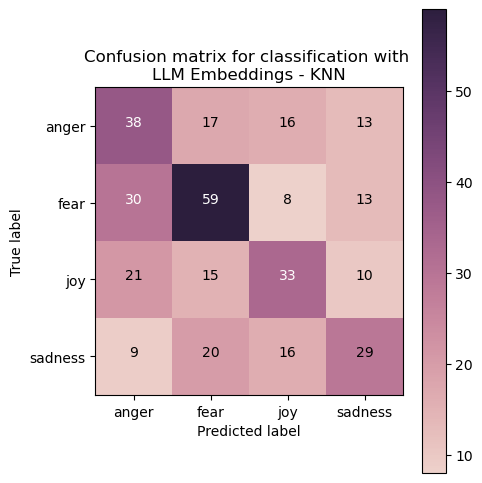

In [71]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

In [72]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy())
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) 
X_llama_train.shape 

(3613, 3072)

In [73]:
X_llama_test.shape

(347, 3072)

In [74]:
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)
output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [75]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
# input layer
model_input = Input(shape=(input_shape_llama, )) # 3072
X = model_input
  # 1st hidden layer
X_W1 = Dense(units=64)(X) # 64
H1 = ReLU()(X_W1)
  # 2nd hidden layer
H1_W2 = Dense(units=64)(H1) # 64
H2 = ReLU()(H1_W2)
  # output layer
H2_W3 = Dense(units=output_shape)(H2) # 4
H3 = Softmax()(H2_W3)
model_output = H3
  # create model
model = Model(inputs=[model_input], outputs=[model_output])
  # loss function & optimizer
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
  # show model construction
model.summary() 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('/Users/liaojingwen/Desktop/Lab2/training_log.csv')
          # training setting
epochs = 25
batch_size = 32
# training!
history = model.fit(X_llama_train, y_train_llama,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[csv_logger],
    validation_data = (X_llama_test, y_test_llama))

print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3932 - loss: 1.3566 - val_accuracy: 0.5533 - val_loss: 1.1091
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6357 - loss: 0.8717 - val_accuracy: 0.5533 - val_loss: 1.1066
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7320 - loss: 0.6779 - val_accuracy: 0.5591 - val_loss: 1.0778
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7826 - loss: 0.5921 - val_accuracy: 0.5447 - val_loss: 1.1968
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8505 - loss: 0.4315 - val_accuracy: 0.5620 - val_loss: 1.3926
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.4005 - val_accuracy: 0.5620 - val_loss: 1.3761
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8764 - loss: 0.3328 - val_accuracy: 0.5562 - val_loss: 1.3884
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9310 - loss: 0.2253 - val_accuracy: 0.

In [78]:
pred_result = model.predict(X_llama_test, batch_size=128) ## predict
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[2.92500347e-01, 7.07302630e-01, 6.07553261e-07, 1.96427034e-04],
       [9.99999762e-01, 3.64273580e-13, 2.22562406e-07, 9.61277458e-09],
       [2.07711849e-02, 8.71634305e-01, 4.18848276e-06, 1.07590266e-01],
       [3.50676768e-04, 2.52057542e-10, 9.08715010e-01, 9.09343958e-02],
       [8.64779949e-01, 1.27638891e-01, 6.42054010e-06, 7.57483020e-03]],
      dtype=float32)

In [79]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'fear', 'joy', 'anger'], dtype=object)

In [80]:
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2))) 

testing accuracy: 0.56


In [81]:
training_log = pd.DataFrame()
training_log = pd.read_csv('/Users/liaojingwen/Desktop/Lab2/training_log.csv')
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.464711,1.212729,0.553314,1.109138
1,1,0.647938,0.860976,0.553314,1.106592
2,2,0.719900,0.705230,0.559078,1.077770
3,3,0.775256,0.599532,0.544669,1.196822
4,4,0.828397,0.472854,0.561960,1.392585
5,5,0.851093,0.395202,0.561960,1.376104
6,6,0.881816,0.322728,0.556196,1.388439
7,7,0.907279,0.271781,0.559078,1.552432
8,8,0.920841,0.222778,0.593660,1.526682
9,9,0.931082,0.195672,0.599424,1.632841


In [82]:

print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.50      0.57      0.53        84
        fear       0.66      0.58      0.62       110
         joy       0.60      0.54      0.57        79
     sadness       0.46      0.51      0.49        74

    accuracy                           0.56       347
   macro avg       0.56      0.55      0.55       347
weighted avg       0.56      0.56      0.56       347



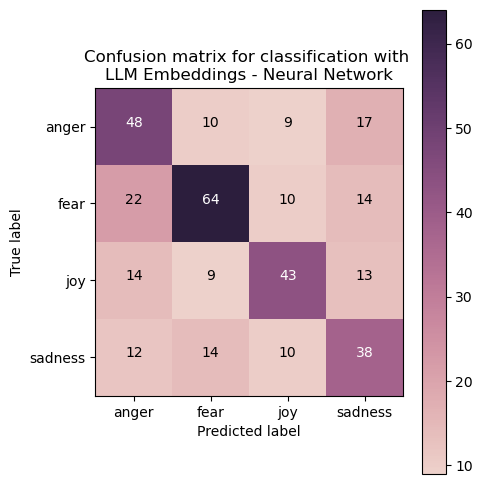

In [83]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

Exercise 12

The comparison between KNN and Neural Network (NN) models using LLM embeddings highlights the strengths and weaknesses of each approach. KNN, a non-parametric method, relies on proximity in the embedding space for classification. While effective for some tasks, it struggles with overlapping embeddings, such as distinguishing between closely related emotions like "fear" and "sadness," leading to reduced accuracy. On the other hand, the NN leverages the richness of LLM embeddings by learning weights for each dimension, enabling it to capture complex, nonlinear relationships. This adaptability often results in higher accuracy, as seen in our training and validation plots. However, NNs are prone to overfitting, especially when the dataset is small, as evidenced by a potential divergence between training and validation loss. The confusion matrix further illustrates that the NN can better separate classes than KNN, though it might still misclassify instances in challenging cases. Overall, LLM embeddings enhance both models, but NNs generally outperform KNNs due to their ability to learn task-specific patterns in the embedding space.

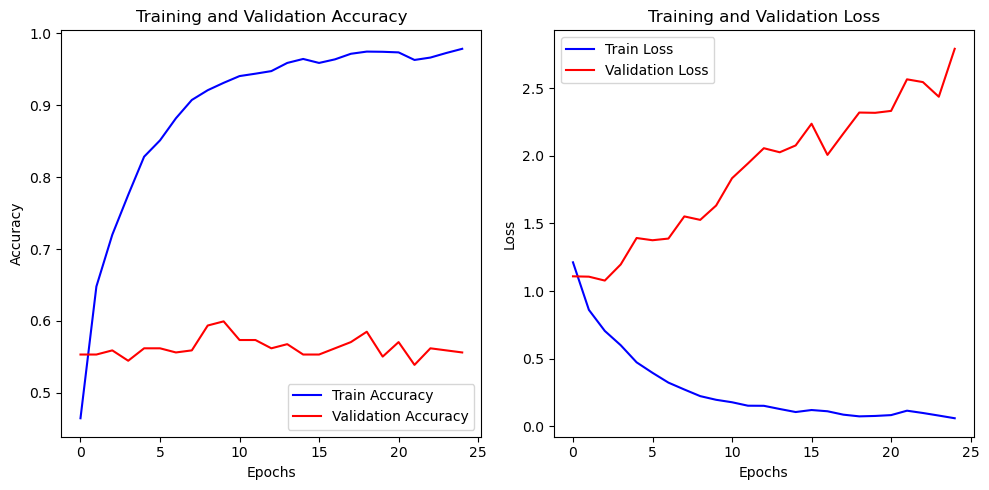

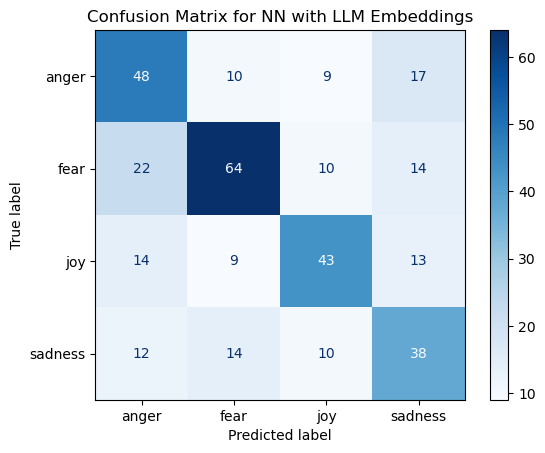

Neural Network Accuracy with LLM Embeddings: 0.56


In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Plot Training and Validation Accuracy and Loss
def plot_training_results(history):
    plt.figure(figsize=(10, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training_results(history)

# Generate Confusion Matrix for NN
def plot_confusion_matrix(cm, classes, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Compute Confusion Matrix
cm_nn = confusion_matrix(y_true=y_test, y_pred=pred_result)

# Define the labels
my_tags = ['anger', 'fear', 'joy', 'sadness']

# Plot the confusion matrix
plot_confusion_matrix(cm_nn, classes=my_tags, title='Confusion Matrix for NN with LLM Embeddings')

# Print Accuracy for NN
accuracy_nn = accuracy_score(y_test, pred_result)
print(f"Neural Network Accuracy with LLM Embeddings: {accuracy_nn:.2f}")


10.5 Few-Shot Prompting Classification


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.





2024-12-07 10:13:29,741 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:29,936 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:30,225 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:30,383 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:30,652 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:30,806 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:31,056 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:31,213 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:31,460 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:13:31,627 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/cha

Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.44      0.60      0.51        20
        fear       1.00      0.20      0.33        20
         joy       0.55      0.90      0.68        20
     sadness       0.69      0.55      0.61        20

    accuracy                           0.56        80
   macro avg       0.67      0.56      0.53        80
weighted avg       0.67      0.56      0.53        80



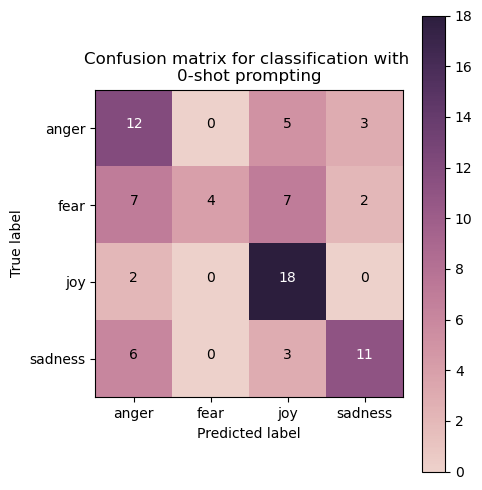

In [89]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
          # Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
          # Define the model to use for few-shot prompting
model_ollama = "llama3.2"
          # Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples
          # Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
"""
    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"   
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text 
                if num_shots == 1: # If 1-shot, break after the first example for each emotion
                    break
    return prompt

def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower() # Clean and standardize the response
        if response not in valid_emotions: # Retry if not a valid response
                      print(f"Invalid response: {response}. Asking for reclassification.")
    return response

def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
              # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0) # Zero-shot has no examples
              # Prepare to classify the test set    
    predictions = []
    true_labels = []
    print(prompt_base)
              # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)
              # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)
              # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
              # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
              # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

run_experiment(df_train, df_test, test_samples=20, num_shots=0)




You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.


Examples: 
Text: A wise man told me that holdin' a grudge is like\nLetting somebody just live inside of your head rent free
Emotion: anger

Text: When your body says FUCK YOU BITCH, You ain't sleeping\n#sleep #cantsleep #drained #restless
Emotion: fear

Text: @_haye_ optimism is he'll lose, that's actually a compromise :P
Emotion: joy

Text: A tummy full of steak, wine, key lime pine and cuddles on tap. What a way to turn around a stressful Wednesday 💛
Emotion: sadness




2024-12-07 10:14:16,917 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:17,103 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:17,354 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:17,520 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:17,795 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:17,975 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:18,223 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:18,399 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:18,657 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:18,822 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/cha

Accuracy: 51.25%
              precision    recall  f1-score   support

       anger       0.36      0.70      0.47        20
        fear       1.00      0.20      0.33        20
         joy       0.60      0.90      0.72        20
     sadness       0.71      0.25      0.37        20

    accuracy                           0.51        80
   macro avg       0.67      0.51      0.47        80
weighted avg       0.67      0.51      0.47        80



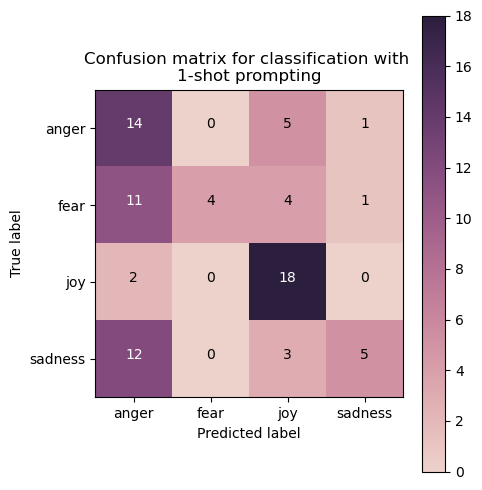

In [90]:
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.


Examples: 
Text: A wise man told me that holdin' a grudge is like\nLetting somebody just live inside of your head rent free
Emotion: anger

Text: What's a Kali's kitten? [She asked, a frown curling on her fair skinned forehead as he showed her the scar] A cat did - (@ScarredTiger)
Emotion: anger

Text: @FoxNews @SheriffClarke @FoxNewsInsider This man is an affront to our justice system.
Emotion: anger

Text: @Austin4evaLEEDS fuming!
Emotion: anger

Text: As if he heard my thought on the ether, my #ex has just posted #facebook pic of himself snuggling up with said #cats... now Im just #angry
Emotion: anger

Text: When your body says FUCK YOU BI

2024-12-07 10:14:59,498 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:59,692 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:14:59,988 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:00,200 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:00,482 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:00,663 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:00,919 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:01,097 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:01,346 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-12-07 10:15:01,527 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/cha

Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.38      0.80      0.52        20
        fear       1.00      0.20      0.33        20
         joy       0.71      0.75      0.73        20
     sadness       0.54      0.35      0.42        20

    accuracy                           0.53        80
   macro avg       0.66      0.53      0.50        80
weighted avg       0.66      0.53      0.50        80



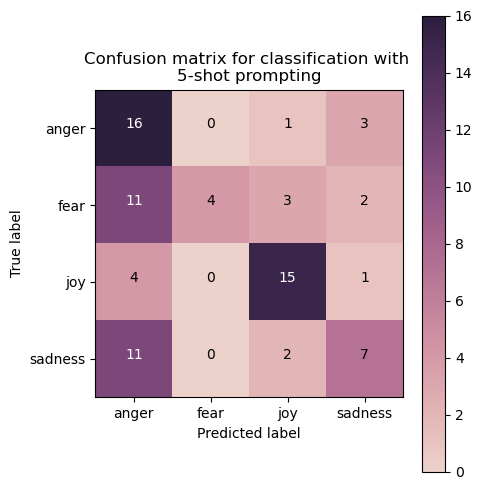

In [91]:
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

Exercise 13

Observations

1. Zero-shot Classification:
    Accuracy: 56.25%
    The model performs relatively well for "joy" and "anger" classes, as these seem to have clearer representations in the embeddings. However, the confusion for "fear" and "sadness" suggests that without examples, the model struggles with distinguishing these nuanced emotions.
2. One-shot Classification:
    Accuracy: 51.25%
    Introducing one example improves the "anger" predictions slightly but leads to increased confusion for "sadness." This shows that while an example provides context, it might not be sufficient to generalize effectively across all labels. Interestingly, "joy" continues to have consistent results, indicating it benefits less from additional examples.
3. Five-shot Classification:
    Accuracy: 52.50%
    With five examples, the model slightly improves predictions for "anger" and "sadness." However, the confusion matrix still shows overlapping areas between "fear" and other emotions. "Joy" sees a marginal decrease in performance, possibly because the examples introduce noise or variability in prediction.


Discussion

In this context, zero-shot classification can be surprisingly effective when the model has strong pretrained embeddings and distinct emotion categories. And, the decreasing accuracy from zero-shot to one-shot could be due to a lack of consistency between the input example and test cases. Five-shot provides some improvement, but the added complexity might lead to overfitting to the few provided examples, especially when the test set has variations. To be more specific, "Joy" consistently has the highest accuracy, possibly due to clear emotional signals in the embeddings. On the other hand, "Fear" and "sadness" frequently overlap, suggesting these categories are less distinct and require better representation or more examples.